# Data preparation

Most of the strcututre of the notebook will be the same as the first one, with small modifications throughout the notebook.The main purpose of this notebook is to create and train a model that will be used to predict the quality of a subimage before classifying it. It has been showned in multiple papers that havaing a quality control step and training on noisy data can improve the success rate of a tuning run.

## Import libraries

In [1]:
import sys, os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the path to the src folder to the path
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Load and crop images

We will procced to load the images and crop them to the size of the subimages we will be using for training, with the exception that we will be using the simulated images with unifrom noise and not the ones with normaly distributed noise.

In [2]:
# from ml_tools.data.subimage_generator import SubImageGenerator

# # Set up the path to the data
# data_path = '../data/raw/data_qflow_v2/simulated/sim_uniform/'
# data_files = glob.glob(data_path + '*.hdf5')

# for raw_data_file in data_files:
#     generator = SubImageGenerator(border_margin=20)

#     cropped_data = generator.generate_multiple_sub_images(
#         raw_data_file, save_images=True, return_images=False)

## Load subimages and create a dataset for training


In [3]:
# from ml_tools.preprocessing.dataset_preparator import DatasetPreparator

# subimage_folder_path = '../data/interim/data_qflow_v2/simulated/sim_uniform/'

# preparator = DatasetPreparator()

# train_data, train_labels, validation_data, validation_labels = preparator.prepare_dataset(
#                         path_or_dict=subimage_folder_path,
#                         save_path="../data/interim/data_qflow_v2/simulated/sim_uniform/",
#                         train_validation_split=0.75, 
#                         label_key_name='data_quality', 
#                         )

Plot a few images to check if everything is ok

In [4]:
# # Plot a few images to check if everything is ok
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].imshow(train_data[0, :, :, 0])
# ax[1].imshow(train_data[1, :, :, 0])
# ax[2].imshow(train_data[2, :, :, 0])
# plt.show()


## Preprocess the data


In [5]:
# from ml_tools.preprocessing.subimage_preprocessor import SubImagePreprocessor


# # Define the path to the dataset
# dataset_path = '../data/interim/data_qflow_v2/simulated/sim_uniform/unprocessed_dataset/'

# # Load training data and labels
# train_data_path = dataset_path + 'training/training_data.npz'
# train_labels_path = dataset_path + 'training/training_labels.npz'
# validation_data_path = dataset_path + 'validation/validation_data.npz'
# validation_labels_path = dataset_path + 'validation/validation_labels.npz'

# train_data = np.load(train_data_path)['training_data']
# train_labels = np.load(train_labels_path)['training_labels']
# validation_data = np.load(validation_data_path)['validation_data']
# validation_labels = np.load(validation_labels_path)['validation_labels']
	
# preprocessor = SubImagePreprocessor(
#     auto_invert=False,
#     noise_reduction=[],
#     clip_value=None,
#     cutoff_value= None
# )

# save_path = '../data/processed/data_qflow_v2/simulated/sim_uniform/'

# processed_train_data, proccessed_train_labels = preprocessor.preprocess_subimages(
#     train_data,
#     train_labels,
#     train_or_validation='training',
#     save_path=save_path
#     )
# processed_validation_data,processed_validation_labels = preprocessor.preprocess_subimages(
#     validation_data,
#     validation_labels,
#     train_or_validation='validation',
#     save_path=save_path
#     )


In [6]:
# # Plot a few images at random
# # Generate 3 random index
# random_idx = np.random.randint(0, train_data.shape[0], 3)
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].set_title('label:'+str(train_labels[random_idx[0]]))
# ax[1].set_title('label:'+str(train_labels[random_idx[1]]))
# ax[2].set_title('label:'+str(train_labels[random_idx[2]]))
# ax[0].imshow(processed_train_data[random_idx[0], :, :, 0])
# ax[1].imshow(processed_train_data[random_idx[1], :, :, 0])
# ax[2].imshow(processed_train_data[random_idx[2], :, :, 0])
# # Plot the original images 
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].imshow(train_data[random_idx[0], :, :, 0])
# ax[1].imshow(train_data[random_idx[1], :, :, 0])
# ax[2].imshow(train_data[random_idx[2], :, :, 0])
# # Plot the labels as titles 
# plt.show()

# Model creation and training

In [7]:
# Define the path to the dataset
dataset_path = '../data/processed/data_qflow_v2/simulated/sim_uniform/processed_dataset/'

# Load training data and labels
train_data_path = dataset_path + 'training/processed_training_data.npz'
train_labels_path = dataset_path + 'training/processed_training_labels.npz'
train_data = np.load(train_data_path)['data']
train_labels = np.load(train_labels_path)['labels']

validation_data_path = dataset_path + 'validation/processed_validation_data.npz'
validation_labels_path = dataset_path + 'validation/processed_validation_labels.npz'
validation_data = np.load(validation_data_path)['data']
validation_labels = np.load(validation_labels_path)['labels']

print("Shape of training data: ", train_data.shape)
print("Shape of training labels: ", train_labels.shape)
print("Shape of validation data: ", validation_data.shape)
print("Shape of validation labels: ", validation_labels.shape)

Shape of training data:  (7295, 30, 30, 1)
Shape of training labels:  (7295, 3)
Shape of validation data:  (2325, 30, 30, 1)
Shape of validation labels:  (2325, 3)


In [8]:
train_data_transpose = np.transpose(train_data, (0, 3, 1, 2))
validation_data_transpose = np.transpose(validation_data, (0, 3, 1, 2))

In [9]:
# from pytorch_lightning import Trainer
# from pytorch_lightning.callbacks import EarlyStopping
# import mlflow
# import torch

# from ml_tools.models.quality_control import QualityControl
# from ml_tools.models.model_utils import prepare_dataloader


# # Auto log all the parameters, metrics, and models
# mlflow.pytorch.autolog()

# train_dataloader = prepare_dataloader(train_data_transpose, train_labels, batch_size=64)
# val_dataloader = prepare_dataloader(validation_data_transpose, validation_labels, batch_size=128)

# model = QualityControl()

# # Print the model summary
# print(model)

# early_stop_callback = EarlyStopping(
#    monitor='val_loss',
#    min_delta=0.00,
#    patience=3,
#    verbose=False,
#    mode='min'
# )

# trainer = Trainer(callbacks=[early_stop_callback])

# with mlflow.start_run() as run:
#     trainer.fit(model, train_dataloader, val_dataloader)

# # Save the model
# torch.save(model.state_dict(), '../models/quality_control/quality_control_early_stopping.pt')

/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /local/rbals/miniconda3/envs/colibri/lib/python3.10/ ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


QualityControl(
  (activation_fn): SiLU()
  (features): Sequential(
    (0): Conv2d(1, 184, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(184, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
    (3): Dropout(p=0.05, inplace=False)
    (4): Conv2d(184, 249, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(249, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): SiLU()
    (7): Dropout(p=0.0, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (global_avg_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc_layers): Sequential(
    (0): Linear(in_features=249, out_features=161, bias=True)
    (1): SiLU()
    (2): Dropout(p=0.6, inplace=False)
  )
  (fc_final): Linear(in_features=161, out_features=3, bias=True)
)


/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /local/rbals/miniconda3/envs/colibri/lib/python3.10/ ...
  rank_zero_warn(
/local/rbals/miniconda

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:490: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 8: 100%|██████████| 114/114 [00:01<00:00, 89.18it/s, v_num=0] 


2023/09/28 01:58:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local/rbals/miniconda3/envs/colibri/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


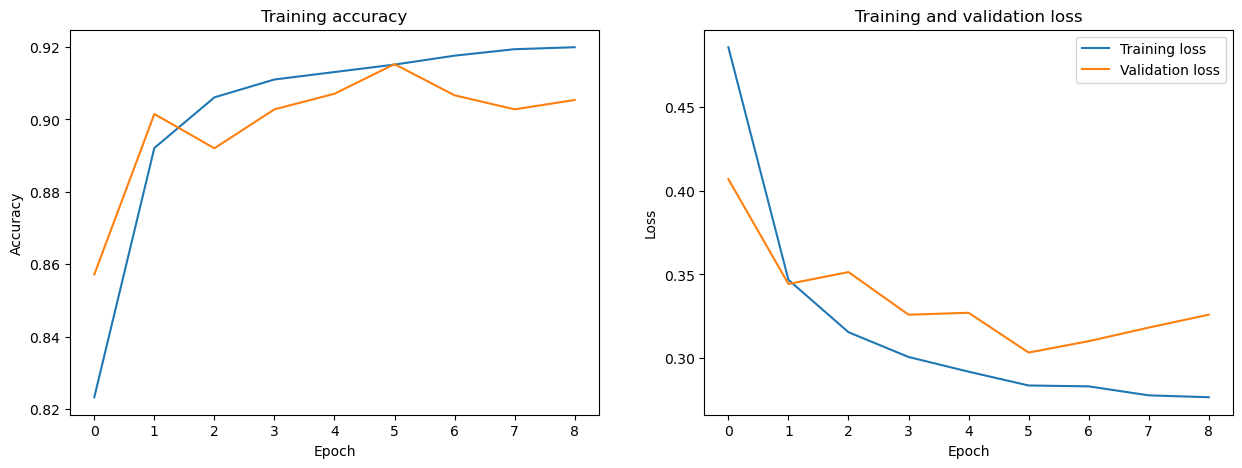

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
mlruns_path = 'mlruns/0/f249dd3d1b894b5d95f70cefaddbd5c4/metrics/'

train_accuracy_path = mlruns_path + 'train_accuracy'
train_loss_path = mlruns_path + 'train_loss'
val_accuracy_path = mlruns_path + 'val_accuracy'
val_loss_path = mlruns_path + 'val_loss'


# Load the metrics with pandas
train_accuracy = pd.read_csv(train_accuracy_path ,sep=' ',header=None, names=["Time", "Accuracy", "Step"])
train_loss = pd.read_csv(train_loss_path ,sep=' ', names=["Time", "Train_Loss", "Step"])
val_accuracy = pd.read_csv(val_accuracy_path ,sep=' ', names=["Time", "Accuracy", "Step"])
val_loss = pd.read_csv(val_loss_path ,sep=' ', names=["Time", "Val_Loss", "Step"])


# Plot the metrics
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_accuracy['Step'], train_accuracy['Accuracy'])
ax[0].plot(val_accuracy['Step'], val_accuracy['Accuracy'])
ax[0].set_title('Training accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].plot(train_loss['Step'], train_loss['Train_Loss'], label='Training loss')
ax[1].plot(val_loss['Step'], val_loss['Val_Loss'], label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()


# Model validation

In [11]:
# # Load the saved model
# model_weights = torch.load('../models/state_estimator/state_estimator_early_stopping.pt')

# # Create a new model instance
# model = StateEstimator(model_opt='noise_opt')

# # Load the model weights
# model.load_state_dict(model_weights)

# # Set the model to evaluation mode
# model.eval()

# # Get a random index
# random_idx = np.random.randint(0, validation_data_transpose.shape[0])

# # Get the prediction
# prediction = model(torch.from_numpy(validation_data_transpose[random_idx, :, :, :]).unsqueeze(0).float())

# # Convert the tensor to numpy array for easier formatting
# pred_array = prediction.detach().numpy()[0]  # Take the first row since prediction is 2D

# # Using f-string for nicer printing
# pred_str = ", ".join([f"{val:.5f}" for val in pred_array])
# label_str = ", ".join([f"{val:.5f}" for val in validation_labels[random_idx]])

# print(f"Prediction: [{pred_str}]")
# print(f"Label:      [{label_str}]")

# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# ax.imshow(validation_data[random_idx, :, :, 0])
# plt.show()

In [12]:
# from ml_tools.preprocessing.subimage_preprocessor import SubImagePreprocessor

# # Get all the .npy files in the folder
# data_files = glob.glob('../data/raw/data_qflow_v2/experimental/exp_small/dataset_0/*.npy')

# print(data_files)

# # extract only what we need from the data.
# # note that there is no noise_class label for experimental data
# exp_data = []; exp_labels = []
# for f in data_files:
#     d = np.load(f, allow_pickle=True).item()
#     exp_data.append(d['sensor'])
#     exp_labels.append(d['label'])

# # convert only labels to list because exp_data contains different shaped data.
# exp_labels = np.array(exp_labels)

# # preprocess
# # Autoflip because sensor gradient sign is unknown. 
# # Don't denoise because it doesn't help.
# exp_prepper = SubImagePreprocessor(
#     auto_invert=True,
#     noise_reduction=[],
#     clip_value=None,
#     cutoff_value= None
# )

# proc_exp_data,exp_labels = exp_prepper.preprocess_subimages(exp_data,exp_labels)

In [13]:
# import torch.nn.functional as F

# # Transpose the data to match the model input
# proc_exp_data_transpose = np.transpose(proc_exp_data, (0, 3, 1, 2))

# def compute_loss_and_accuracy(model, data, labels):
#     # Convert the data and labels to PyTorch tensors
#     data_tensor = torch.from_numpy(data).float()
#     labels_tensor = torch.argmax(torch.from_numpy(labels), dim=1).long()

#     # Pass the data through the model
#     predictions = model(data_tensor)
    
#     # Compute the loss
#     loss = F.cross_entropy(predictions, labels_tensor)
    
#     # Compute the accuracy
#     predicted_labels = torch.argmax(predictions, dim=1)
#     accuracy = (predicted_labels == labels_tensor).float().mean().item()
    
#     return loss.item(), accuracy

# # Compute the loss and accuracy for the experimental data
# exp_loss, exp_accuracy = compute_loss_and_accuracy(model, proc_exp_data_transpose, exp_labels)

# print(f"Experimental Data Loss: {exp_loss:.4f}")
# print(f"Experimental Data Accuracy: {exp_accuracy*100:.2f}%")
